# Carga de los datos

In [1]:
import pandas as pd
data = pd.read_csv('../db/dataset_tissue.txt', header=None, sep=' ')
labels = pd.read_csv('../db/clase.txt', header=None)

print(data)

                                                       0
0      ,"GSM11805.CEL.gz","GSM11814.CEL.gz","GSM11823...
1      1007_s_at,10.1912666822211,10.5091673351314,10...
2      1053_at,6.04046250272039,6.69607547976383,6.14...
3      117_at,7.44740927631719,7.77535403522073,7.696...
4      121_at,12.0250418580982,12.0078171043575,11.63...
...                                                  ...
22211  91703_at,6.43485083964546,7.6769887682576,6.42...
22212  91816_f_at,5.70044827295955,6.56647865392162,5...
22213  91826_at,9.21116303052509,9.41598030255139,8.1...
22214  91920_at,8.33913007018526,8.21442605889894,8.4...
22215  91952_at,7.36779705423511,7.9177537650076,7.59...

[22216 rows x 1 columns]


In [2]:
print(labels)

         0         1
0      NaN         x
1      1.0    kidney
2      2.0    kidney
3      3.0    kidney
4      4.0    kidney
..     ...       ...
185  185.0  placenta
186  186.0  placenta
187  187.0  placenta
188  188.0  placenta
189  189.0  placenta

[190 rows x 2 columns]


# Version 2
### No estoy seguro cual es mejor

In [3]:
import pandas as pd

# Cargar los datos genéticos desde 'datasettissue.txt'
data = pd.read_csv('../db/dataset_tissue.txt', header=None, sep=' ')

# Cargar las etiquetas de clase desde 'clases.txt'
clases = pd.read_csv('../db/clase.txt', header=None, sep=' ',names=['Clase'])

# Verificar la estructura de los datos y las etiquetas
print("Dimensiones de los datos:", data.shape)
print("Ejemplo de los datos:")
print(data.head())
print("Ejemplo de las etiquetas:")
print(clases.head())

Dimensiones de los datos: (22216, 1)
Ejemplo de los datos:
                                                   0
0  ,"GSM11805.CEL.gz","GSM11814.CEL.gz","GSM11823...
1  1007_s_at,10.1912666822211,10.5091673351314,10...
2  1053_at,6.04046250272039,6.69607547976383,6.14...
3  117_at,7.44740927631719,7.77535403522073,7.696...
4  121_at,12.0250418580982,12.0078171043575,11.63...
Ejemplo de las etiquetas:
        Clase
0        ,"x"
1  1,"kidney"
2  2,"kidney"
3  3,"kidney"
4  4,"kidney"


## Reduccion

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler  # Agregamos la importación

skip_rows = 1  # omitir la primera fila
data = pd.read_csv('../db/dataset_tissue.txt', skiprows=skip_rows, header=None, sep=',')  # Cambiar el separador a ','

# Eliminar la primera columna que contiene identificadores de genes
data = data.iloc[:, 1:]

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max a tus datos
normalized_data = scaler.fit_transform(data)

# Especificar el número de componentes principales a retener
n_components = 10

# Crear una instancia de PCA con el número de componentes
pca = PCA(n_components=n_components)

# Ajustar y transformar los datos con PCA
data_pca = pca.fit_transform(normalized_data)

print(data_pca)

[[ 4.00348016  0.33857487 -0.6251264  ... -0.05279416 -0.08566253
   0.39024894]
 [-1.73972518 -0.16959045 -0.14137785 ... -0.05424737  0.09434581
   0.06034385]
 [ 0.60699112 -0.26259399  0.3345809  ...  0.13180037  0.12405824
   0.05958305]
 ...
 [ 0.70591661 -0.32843881 -0.26138034 ...  0.0778585  -0.04572437
  -0.00987744]
 [ 1.81609239  0.31259468  0.11254222 ...  0.24398218 -0.05425563
   0.32945202]
 [ 0.74111991 -0.03251617 -0.0723081  ...  0.12945562  0.03598029
  -0.0119978 ]]


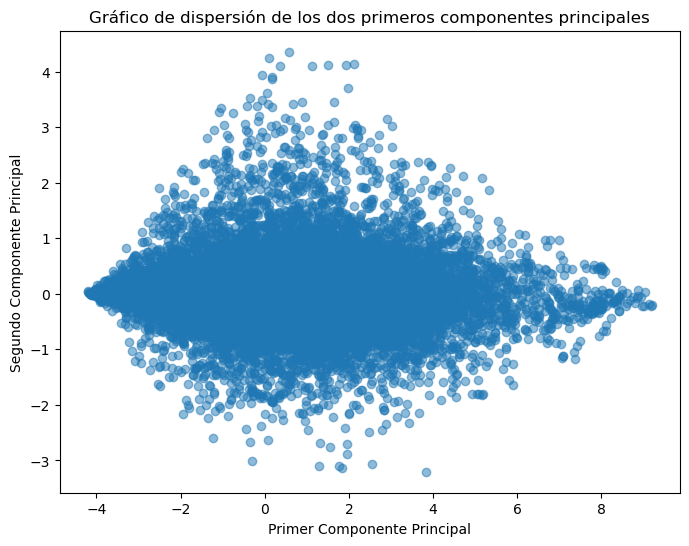

In [5]:
import matplotlib.pyplot as plt

# Extraer los dos primeros componentes principales
component1 = data_pca[:, 0]
component2 = data_pca[:, 1]

# Dibuja un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(component1, component2, alpha=0.5)
plt.title('Gráfico de dispersión de los dos primeros componentes principales')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.show()


# Version 2:

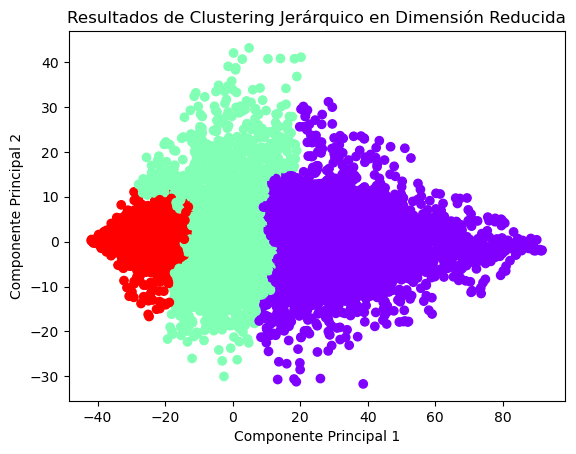

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Realizar la reducción de dimensionalidad con PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales para la visualización
reduced_data = pca.fit_transform(data)

# Inicializar y entrenar el modelo de Agglomerative Hierarchical Clustering
num_clusters = 3  # Número de clústeres (ajustar según tus necesidades)
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = agg_clustering.fit_predict(reduced_data)

# Visualizar los resultados del clustering
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados de Clustering Jerárquico en Dimensión Reducida')
plt.show()


# DBSCAN

In [7]:
import numpy as np

def euclidean_distance(x, y):
    return np.linalg.norm(x - y)


In [8]:
def range_query(data, point, epsilon, distance_func):
    neighbors = []
    for i, data_point in enumerate(data):
        if distance_func(point, data_point) <= epsilon:
            neighbors.append(i)
    return neighbors

In [10]:
def dbscan(data, epsilon, min_samples, distance_func):
    labels = [None] * len(data)
    cluster_id = 0

    for i, point in enumerate(data):
        if labels[i] is not None:
            continue

        neighbors = range_query(data, point, epsilon, distance_func)

        if len(neighbors) < min_samples:
            labels[i] = -1  # Marcar como ruido (punto no asignado a ningún clúster)
        else:
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_samples, distance_func)

    return labels

def expand_cluster(data, labels, point_index, neighbors, cluster_id, epsilon, min_samples, distance_func):
    labels[point_index] = cluster_id

    i = 0
    while i < len(neighbors):
        neighbor_index = neighbors[i]

        if labels[neighbor_index] is None:
            labels[neighbor_index] = cluster_id
            neighbor_neighbors = range_query(data, data[neighbor_index], epsilon, distance_func)

            if len(neighbor_neighbors) >= min_samples:
                neighbors.extend(neighbor_neighbors)

        i += 1

In [11]:
# Ejemplo de uso
epsilon = 3.0
min_samples = 2

cluster_labels = dbscan(data, epsilon, min_samples, euclidean_distance)
print(cluster_labels)


[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46, 46, 47, 47, 47, 47, 48, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

# Segunda version
### Necesita realizar pruebas

In [12]:
import numpy as np

def dbscan(data, epsilon, min_samples):
    # Inicializar las etiquetas de los puntos
    labels = np.zeros(len(data))
    cluster_id = 0
    
    for i in range(len(data)):
        if labels[i] != 0:
            continue
        
        # Encontrar los vecinos dentro del radio de epsilon
        neighbors = find_neighbors(data, i, epsilon)
        
        if len(neighbors) < min_samples:
            labels[i] = -1  # Marcar como ruido
        else:
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_samples)
    
    return labels

def find_neighbors(data, point_index, epsilon):
    neighbors = []
    for i in range(len(data)):
        if np.linalg.norm(data[point_index] - data[i]) < epsilon:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, labels, point_index, neighbors, cluster_id, epsilon, min_samples):
    labels[point_index] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor = neighbors[i]
        if labels[neighbor] == -1:
            labels[neighbor] = cluster_id
        elif labels[neighbor] == 0:
            labels[neighbor] = cluster_id
            new_neighbors = find_neighbors(data, neighbor, epsilon)
            if len(new_neighbors) >= min_samples:
                neighbors += new_neighbors
        i += 1

# Implementación de DBSCAN (por hacer)

# Ajustar hiperparámetros según tus datos
#epsilon = 0.5  # Radio de vecindad
#min_samples = 5  # Número mínimo de puntos para formar un clúster

# Llamar a la función DBSCAN y obtener los clústeres
#cluster_labels = dbscan(data_pca, epsilon, min_samples) 

# Visualizar los resultados de DBSCAN (por hacer)


# Implementacion de la visualizacion:

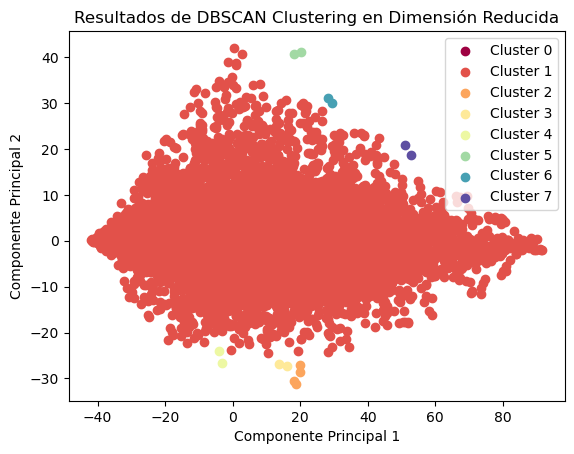

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Función para visualizar los resultados de DBSCAN
def visualize_dbscan(data, labels):
    num_clusters = len(np.unique(labels))
    colors = plt.cm.Spectral(np.linspace(0, 1, num_clusters))

    for cluster_id in range(num_clusters):
        plt.scatter(data[labels == cluster_id, 0], data[labels == cluster_id, 1], label=f'Cluster {cluster_id}', c=[colors[cluster_id]])

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Resultados de DBSCAN Clustering en Dimensión Reducida')
    plt.legend()
    plt.show()

# Aplicar DBSCAN al conjunto de datos reducido
cluster_labels = dbscan(reduced_data, epsilon=3.0, min_samples=2)

# Visualizar los resultados de DBSCAN
visualize_dbscan(reduced_data, cluster_labels)

# Evaluacion de la calidad con la metrica Sillhouette

In [14]:
from sklearn.metrics import silhouette_score

# Calcular el índice Silhouette para evaluar la calidad de los clústeres
silhouette_avg = silhouette_score(data, cluster_labels)
print("Índice Silhouette:", silhouette_avg)

Índice Silhouette: 0.23735827977332327


In [15]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

# Evaluación del DBSCAN
# Suponiendo que ya se ha aplicado DBSCAN y se han obtenido las etiquetas de clústeres en 'dbscan_labels'
# También se asume que 'reduced_data' es el conjunto de datos reducido con PCA

# Índice Davies-Bouldin
davies_bouldin = davies_bouldin_score(data, cluster_labels)
print("Índice Davies-Bouldin:", davies_bouldin)

# Coeficiente de Silueta Medio
silhouette_avg = silhouette_score(data, cluster_labels)
print("Coeficiente de Silueta Medio:", silhouette_avg)

# Puntuación Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(reduced_data, cluster_labels)
print("Puntuación Calinski-Harabasz:", calinski_harabasz)


Índice Davies-Bouldin: 2.06825502928787
Coeficiente de Silueta Medio: 0.23735827977332327
Puntuación Calinski-Harabasz: 7.175893995277505


# Visualizacion de cada cluster

### Hecho como se pide en el proyecto, por sus etiquetas:

In [16]:
# Cargar los nombres de los tejidos desde clases.txt
nombres_tejidos = pd.read_csv('../db/clase.txt', header=None, names=['Tejido'])

# Agregar las etiquetas de clústeres a los datos
data['Cluster'] = cluster_labels

# Combinar data con nombres_tejidos
data = data.join(nombres_tejidos)

# Obtener los nombres de tejidos más frecuentes en cada clúster
frequent_tissues = data.groupby('Cluster')['Tejido'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Mostrar los nombres de tejidos más frecuentes en cada clúster
print("Nombres de tejidos más frecuentes en cada clúster:")
print(frequent_tissues)


IndexError: index 0 is out of bounds for axis 0 with size 0